# Statistical analysis

## Load docs

In [1]:
import pickle

with open("docs-all-chunks", "rb") as file:
    docs = pickle.load(file)

In [2]:
import statistics
import numpy as np

def get_chunk_stats(docs: list, chunk_strategy: str):
    """
    Get stats for all chunks in a list of docs
    - chunk_strategy: e.g. jina-segmenter-api or text-seg-lm
    """
    output = {}
    all_chunks = []
    for doc in docs:
        all_chunks.extend(doc.chunks[chunk_strategy])

    lengths = [len(chunk) for chunk in all_chunks]

    output["total_chunks"] = len(all_chunks)
    output['max_length'] = max(lengths)
    output['min_length'] = min(lengths)
    output['mean_length'] = round(sum(lengths) / len(lengths))
    output['median_length'] = round(statistics.median(lengths))
    
    # Calculate percentiles
    output['25th_percentile'] = round(np.percentile(lengths, 25))
    output['50th_percentile'] = round(np.percentile(lengths, 50))  # Same as the median
    output['75th_percentile'] = round(np.percentile(lengths, 75))

    return output

In [3]:
all_stats = []
for key in docs[0].chunks.keys():
    stats = get_chunk_stats(docs, key)
    stats["name"] = key
    all_stats.append(stats)

In [30]:
from rich.console import Console
from rich.table import Table

# Create a console object
console = Console()

# Create a table object
table = Table(title="Chunking Strategies Data", show_header=True, header_style="bold magenta")

# Add columns to the table
table.add_column("Chunking Strategy", justify="left")
table.add_column("Total Chunks", justify="center")
table.add_column("Max Length", justify="center")
table.add_column("Min Length", justify="center")
table.add_column("Mean Length", justify="center")

table.add_column("25th Percentile", justify="center")
table.add_column("Median Length", justify="center")
table.add_column("75th Percentile", justify="center")


# Add rows of data
for item in all_stats:
    table.add_row(
        item['name'],
        str(item['total_chunks']),
        str(item['max_length']),
        str(item['min_length']),
        str(item['mean_length']),
        
        str(item['25th_percentile']),
        str(item['median_length']),
        str(item['75th_percentile'])
    )

# Render the table
console.print(table)


                                             Chunking Strategies Data                                              
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Chunking     ┃              ┃            ┃            ┃             ┃     25th     ┃    Median    ┃    75th     ┃
┃ Strategy     ┃ Total Chunks ┃ Max Length ┃ Min Length ┃ Mean Length ┃  Percentile  ┃    Length    ┃ Percentile  ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ simple_chun… │     214      │   21943    │     50     │    2148     │     806      │     1479     │    2278     │
│ cot_topic_c… │     322      │   16967    │     25     │    1334     │     389      │     888      │    1932     │
│ summary_chu… │     233      │   16121    │     33     │    1569     │     443      │     1056     │    1961     │
│ jina-segmen… │     7801     │    2420    │     2      │     82      │      11      │      30      │     84      │
└──────────────┴──────────────┴────────────┴────────────┴─────────────┴──────────────┴──────────────┴─────────────┘

In [24]:
import matplotlib.pyplot as plt

def generate_bar_graph(stats, metric):
    # Extracting chunking strategies and their mean lengths
    chunking_strategies = [item['name'] for item in stats]
    data = [item[metric] for item in stats]
    
    # Creating the plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(chunking_strategies, data, color='skyblue')
    # plt.bar(chunking_strategies, data, color='skyblue')
    

    # Adding counts above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 2), ha='center', va='bottom')
    
    plt.xlabel('Chunking Strategy')
    plt.ylabel(f'{metric} of Chunks')
    plt.title(f'{metric} of Chunks by Chunking Strategy')
    plt.xticks(rotation=45, ha="right")
    
    # Display the plot
    plt.tight_layout()
    plt.show()

    return plt

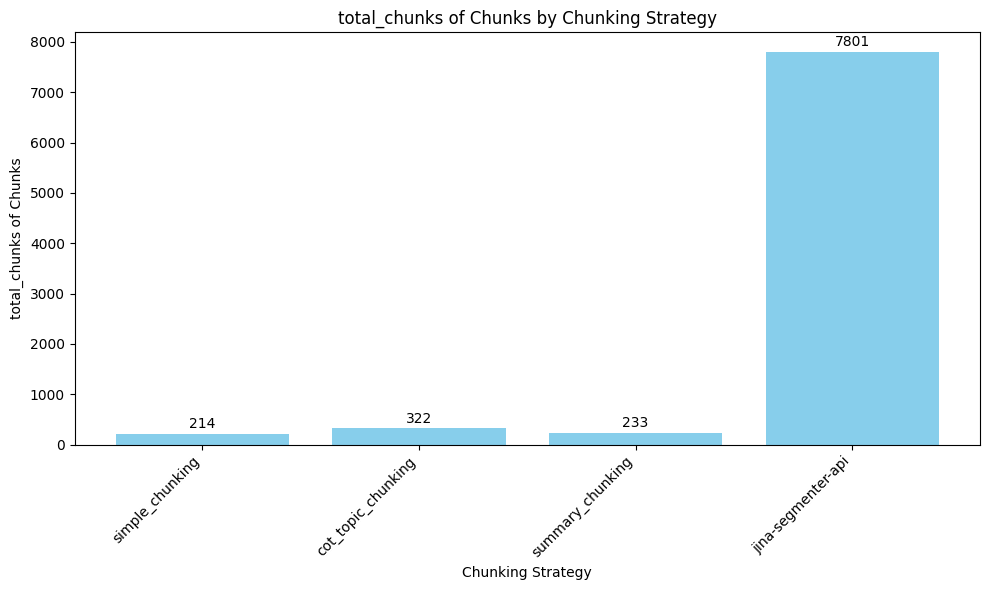

<module 'matplotlib.pyplot' from '/home/alex/env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [25]:
generate_bar_graph(all_stats, "total_chunks")

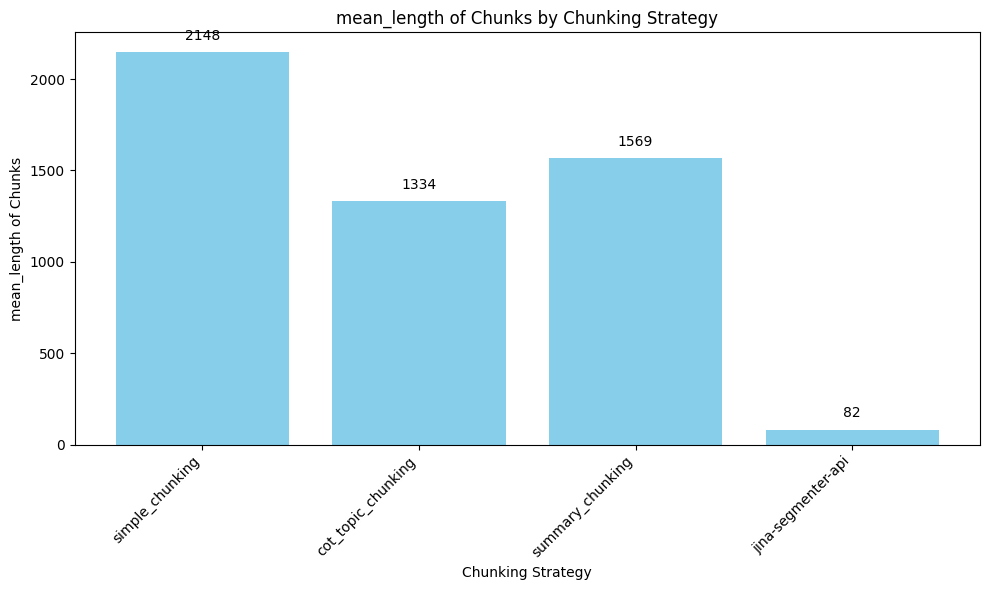

<module 'matplotlib.pyplot' from '/home/alex/env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [26]:
generate_bar_graph(all_stats, "mean_length")